# Predicting the predictions

RTE provides an API to access the predictions of the productions of the different types of energy sources.

The API is available at the following URL: https://data.rte-france.com/catalog/-/api/generation/Generation-Forecast/v2.1



In [110]:
import pandas as pd
from energy_forecast import ROOT_DIR
from energy_forecast.production_forecast import ProductionForecastAPI

sun_flux_file = ROOT_DIR / "data" / "silver" / "group_mean_sun.csv"
wind_speed_file = ROOT_DIR / "data" / "silver" / "group_means_wind.csv"

prediction_file = ROOT_DIR / "data" / "silver" / "forecasted_production_rte.csv"


## First : reading the Weather Data

This step requires the two files in the Data folder.

In [111]:
data_sun = pd.read_csv(sun_flux_file, index_col=0)
data_sun["time"] = pd.to_datetime(data_sun["time"])
data_sun["step"] = pd.to_timedelta(data_sun["step"])
data_sun["valid_time"] = (
    data_sun["time"] + data_sun["step"]
)  # re-forcing the type to datetime

mask_D1 = (data_sun["step"] >= pd.Timedelta("1D")) & (
    data_sun["step"] < pd.Timedelta("2D")
)
data_sunD1 = data_sun.loc[mask_D1]
data_sunD1_regions = data_sunD1.set_index("valid_time").pivot_table(
    index="valid_time", columns="region", values="ssrd"
)
data_sunD1_regions.index = data_sunD1_regions.index.tz_localize("UTC").tz_convert(
    "Europe/Paris"
)
data_sunD1_regions.head()

region,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Corse,Grand Est,Hauts-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur,Île-de-France
valid_time,,,,,,,,,,,,,
2022-02-02 01:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-02 02:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-02 03:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-02 04:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-02 05:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
data_wind = pd.read_csv(wind_speed_file, index_col=False)
data_wind["time"] = pd.to_datetime(data_wind["time"])
data_wind["step"] = pd.to_timedelta(data_wind["step"])
data_wind["valid_time"] = (
    data_wind["time"] + data_wind["step"]
)  # re-forcing the type to datetime

mask_D1 = (data_wind["step"] >= pd.Timedelta("1D")) & (
    data_wind["step"] < pd.Timedelta("2D")
)
data_windD1 = data_wind.loc[mask_D1]
data_windD1_regions = data_windD1.set_index("valid_time").pivot_table(
    index="valid_time", columns="region", values="si10"
)
data_windD1_regions.index = data_windD1_regions.index.tz_localize("UTC").tz_convert(
    "Europe/Paris"
)

data_windD1_regions.head()

region,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Corse,Grand Est,Hauts-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur,Île-de-France
valid_time,,,,,,,,,,,,,
2022-02-02 01:00:00+01:00,3.705175,4.568276,3.618184,5.089186,2.738070,5.581255,7.098129,6.486237,3.067982,5.653931,4.084127,6.189727,5.536256
2022-02-02 02:00:00+01:00,3.642379,4.467238,3.637520,4.925655,3.236441,5.360667,6.929116,6.696957,2.970035,5.337131,4.211257,6.436513,5.553952
2022-02-02 03:00:00+01:00,3.565388,4.325107,3.703880,4.928397,3.292210,5.261508,6.651305,6.627742,2.861727,5.112169,4.206979,6.645758,5.340007
2022-02-02 04:00:00+01:00,3.477547,4.289974,3.734176,4.882295,2.995472,5.266212,6.441283,6.488635,2.668218,5.075777,4.100137,6.682411,5.293652
2022-02-02 05:00:00+01:00,3.476616,4.251610,3.752356,4.757608,2.792265,5.068052,6.376684,6.372849,2.510890,5.077017,3.887392,6.527510,5.267478


<Axes: >

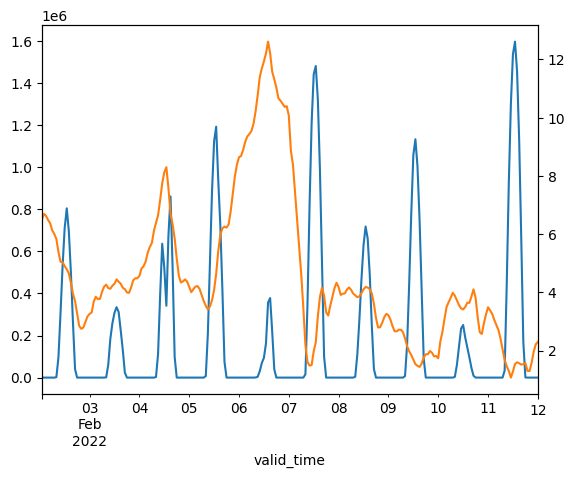

In [113]:
data_sunD1_regions["Normandie"].iloc[0:240].plot()

data_windD1_regions["Normandie"].iloc[0:240].plot(secondary_y=True)

## Second: Accessing the prediction of the production

RTE provides the prevision at D+1 of the production of the different types of energy sources.

In [114]:
forecaste_prediction = pd.read_csv(prediction_file, index_col=0)
forecaste_prediction.index = pd.to_datetime(forecaste_prediction.index, utc=True).tz_convert("Europe/Paris")
prediction_solar = forecaste_prediction["SOLAR_FORECAST_D1"].dropna()
prediction_eolien = forecaste_prediction['EOLIEN_FORECAST_D1'].dropna()

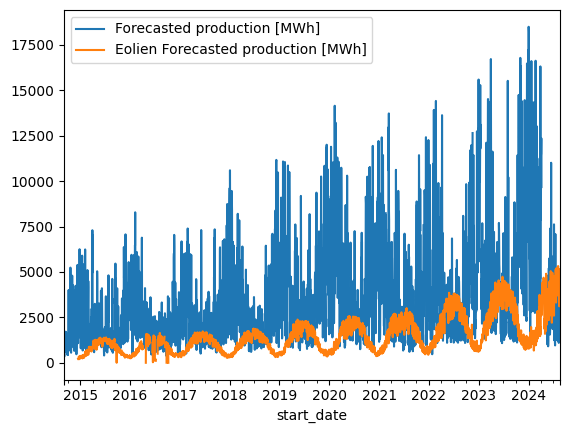

In [115]:
ax = prediction_eolien.resample("1D").mean().plot(label="Forecasted production [MWh]")
prediction_solar.resample("1D").mean().plot(label="Eolien Forecasted production [MWh]", ax=ax)
ax.legend()

# modeling

In [116]:
from sklearn.linear_model import LinearRegression

## prediction of the solar production

In [117]:
first_date = pd.Timestamp("2022-10-01", tz="Europe/Paris")  # the data is strange before this date
last_date = pd.Timestamp("2024-04-06", tz="Europe/Paris")
X_sun_region = data_sunD1_regions.loc[first_date:last_date]
X_sun_region, Y_sun_region = X_sun_region.align(prediction_solar, axis=0, join="inner")
print(X_sun_region.shape, Y_sun_region.shape)

(12569, 13) (12569,)


In [118]:
model_sun = LinearRegression(positive=True, fit_intercept=False)
model_sun.fit(X_sun_region, Y_sun_region)

LinearRegression(fit_intercept=False, positive=True)

In [120]:
Ypred_sun_region = model_sun.predict(X_sun_region)
Ypred_sun_region = pd.Series(Ypred_sun_region, index=Y_sun_region.index)

Text(0.5, 1.0, 'Daily Solar production forecast')

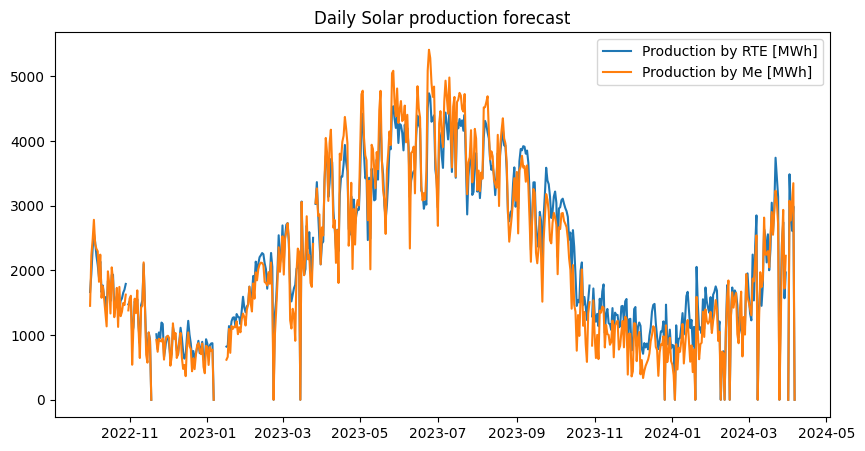

In [121]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(Y_sun_region.resample("1D").mean(), label="Production by RTE [MWh]")
ax.plot(Ypred_sun_region.resample("1D").mean(), label="Production by Me [MWh]")
ax.legend()
ax.set_title("Daily Solar production forecast")

Text(0.5, 1.0, 'Residuals of the solar production forecast')

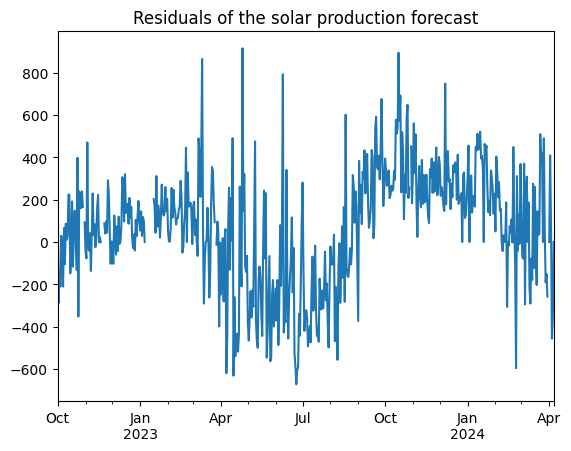

In [122]:
res_sun_region = Y_sun_region - Ypred_sun_region
ax = res_sun_region.resample("1D").mean().plot(legend=False)
ax.set_title("Residuals of the solar production forecast")


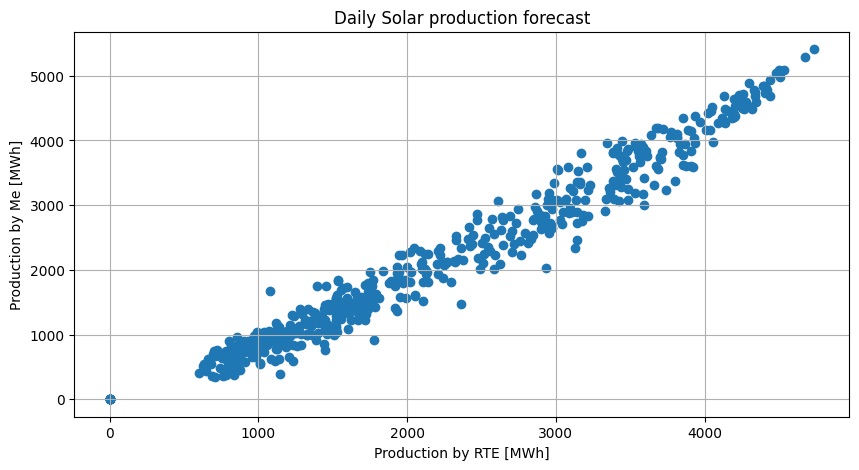

In [125]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(Y_sun_region.resample("1D").mean(), Ypred_sun_region.resample("1D").mean())
ax.set_xlabel("Production by RTE [MWh]")
ax.set_ylabel("Production by Me [MWh]")
ax.set_title("Daily Solar production forecast")

ax.grid(":")

In [126]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(Y_sun_region, Ypred_sun_region), r2_score(Y_sun_region, Ypred_sun_region)

(478338.2624985988, 0.9569429548977504)

## Prediction of the Eolien production

In [127]:
import numpy as np

In [128]:
X_wind_region = data_windD1_regions.loc[first_date:last_date]

X_wind_region, Y_wind_region = X_wind_region.align(prediction_eolien, axis=0, join="inner")
# X_wind = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_wind)

X_squared = X_wind_region ** 2
X_squared.columns = [f"{col}_squared" for col in X_squared.columns]
X_cubed = X_wind_region ** 3
X_cubed.columns = [f"{col}_cubed" for col in X_cubed.columns]

X_wind_region = pd.concat([X_wind_region, X_squared, X_cubed], axis=1)
# X_wind_concat = np.concatenate([X_wind, X_squared, X_cubed], axis=1)


print(X_wind_region.shape, Y_wind_region.shape)

(12433, 39) (12433,)


In [130]:
model_wind = LinearRegression(positive=True, fit_intercept=False)

model_wind.fit(X_wind_region, Y_wind_region)

LinearRegression(fit_intercept=False, positive=True)

In [149]:
Ypred_wind_region = model_wind.predict(X_wind_region)
Ypred_wind_region = pd.Series(Ypred_wind_region, index=Y_wind_region.index)

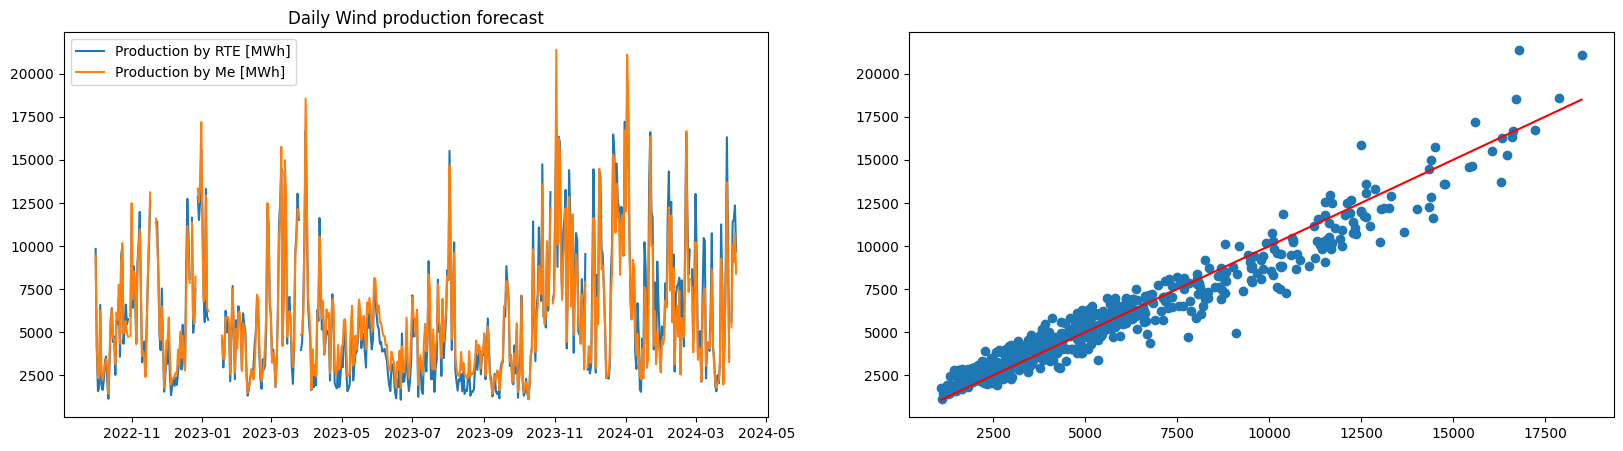

In [150]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20, 5))
ax1.plot(Y_wind_region.resample("1D").mean(), label="Production by RTE [MWh]")
ax1.plot(Ypred_wind_region.resample("1D").mean(), label="Production by Me [MWh]")
ax1.legend()
ax1.set_title("Daily Wind production forecast")

ax2.scatter(Y_wind_region.resample("1D").mean(), Ypred_wind_region.resample("1D").mean())
xs = np.linspace(Y_wind_region.resample("1D").mean().min(), Y_wind_region.resample("1D").mean().max(), 100)
ax2.plot(xs, xs, color="red")

Text(0.5, 1.0, 'Residuals of the wind production forecast')

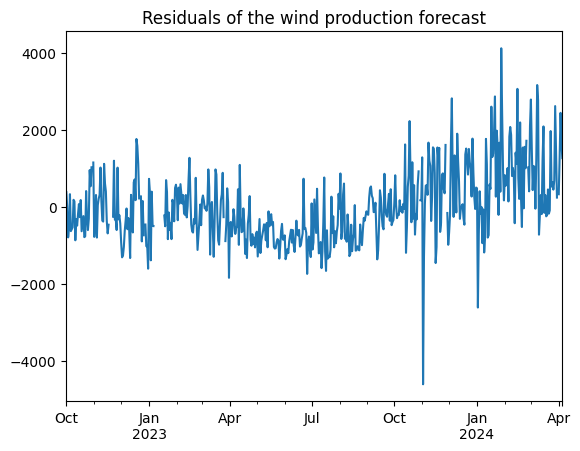

In [151]:
res_wind_region = Y_wind_region - Ypred_wind_region
ax = res_wind_region.resample("1D").mean().plot(legend=False)
ax.set_title("Residuals of the wind production forecast")


In [152]:
print(mean_squared_error(Y_wind_region, Ypred_wind_region), r2_score(Y_wind_region, Ypred_wind_region))

1572944.567933611 0.9037763036154377


# Using a Combination of the two models 
The next section uses a custom Class to model both the solar and the Eolien production.

This is a simple wrapper around the two models.

In [70]:
from energy_forecast.enr_production_model import ENRProductionModel

my_model = ENRProductionModel()

start_date = pd.Timestamp("2022-10-01", tz="Europe/Paris")
last_date = pd.Timestamp("2024-04-06", tz="Europe/Paris")
X_sun = data_sunD1_regions.loc[start_date:last_date]
X_wind = data_windD1_regions.loc[start_date:last_date]
Y_sun = prediction_solar.loc[start_date:last_date]
Y_wind = prediction_eolien.loc[start_date:last_date]

X_wind, Y_wind = X_wind.align(Y_wind, axis=0, join="inner")
X_sun, Y_sun = X_sun.align(Y_sun, axis=0, join="inner")

Y_both = pd.DataFrame(data={"sun": Y_sun, "wind": Y_wind}).dropna()
X_wind = X_wind.loc[Y_both.index]
X_sun = X_sun.loc[Y_both.index]

my_model.fit(X_sun, X_wind, Y_both)

In [71]:
results = my_model.predict(X_sun, X_wind)
results.index = X_wind.index

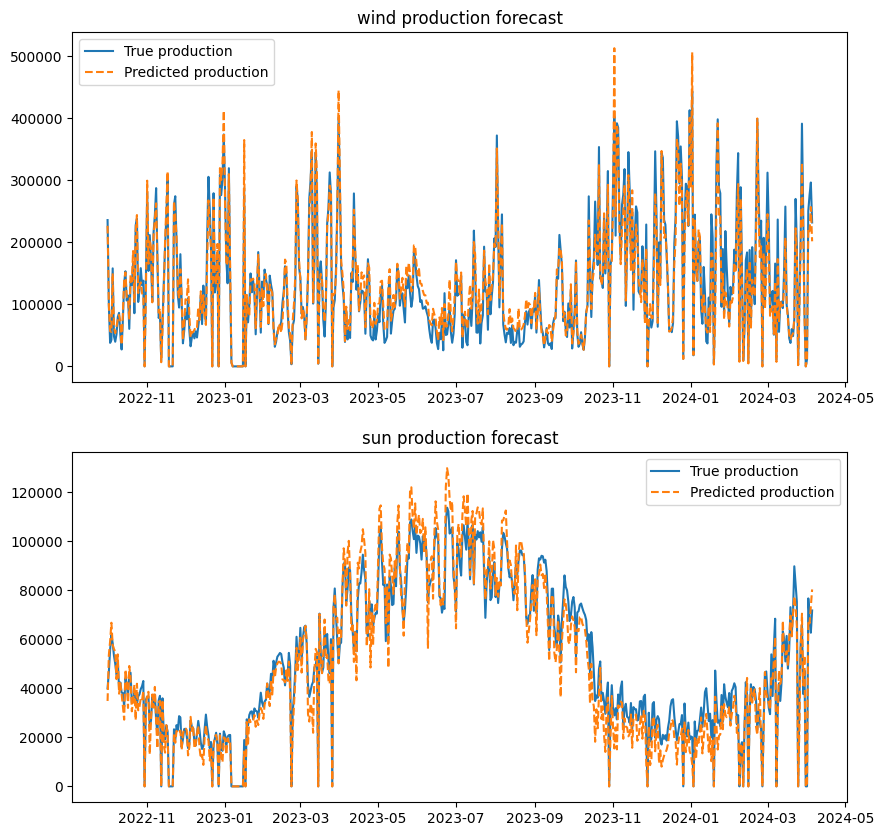

In [72]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(10, 10))

for ax, (col, Y) in zip([ax1, ax2], results.items()):
    ax.plot(Y_both[col].resample("1D").sum(), label="True production")
    ax.plot(Y.resample("1D").sum(), ls="--", label="Predicted production")
    ax.set_title(f"{col} production forecast")
    ax.legend()


In [73]:
# saving the model
my_model.save()

## Re-loading the trained model

The model is loaded from the file `model.pkl` in the Data folder.

In [74]:
my_model2 = ENRProductionModel.load()

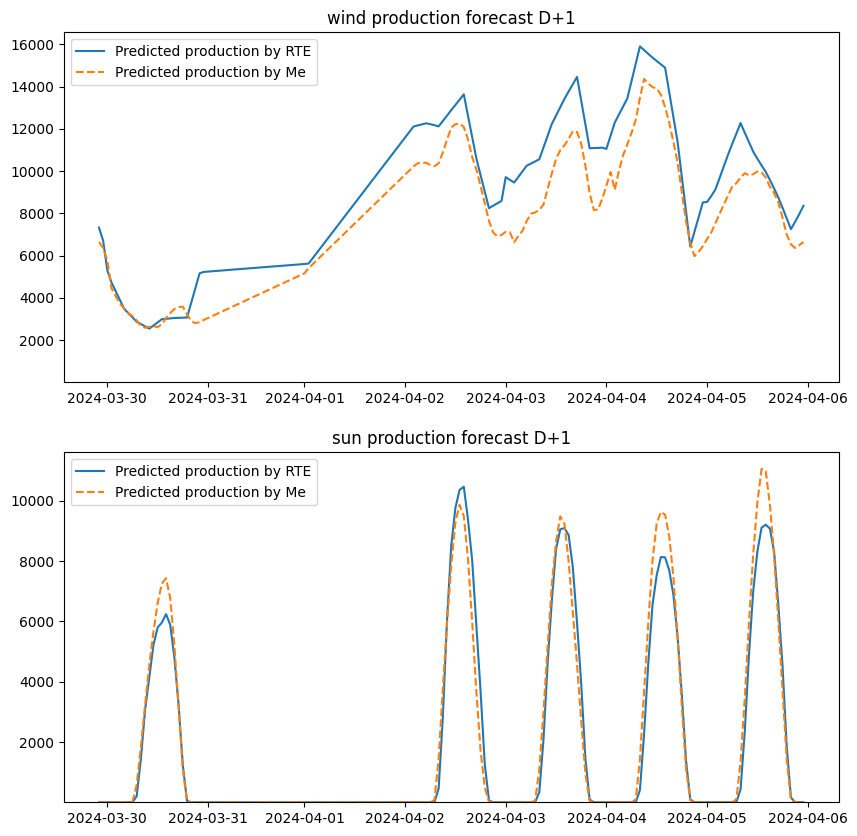

In [82]:
n_days = 7
end_date = Y_both.index[-1]
start_date = end_date - pd.Timedelta(f"{n_days}D")
X_sun = data_sunD1_regions.loc[start_date:end_date]
X_wind = data_windD1_regions.loc[start_date:end_date]
Y_sun = prediction_solar.loc[start_date:end_date]
Y_wind = prediction_eolien.loc[start_date:end_date]

X_wind, Y_wind = X_wind.align(Y_wind, axis=0, join="inner")
X_sun, Y_sun = X_sun.align(Y_sun, axis=0, join="inner")

Y_both = pd.DataFrame(data={"sun": Y_sun, "wind": Y_wind}).dropna()
X_wind = X_wind.loc[Y_both.index]
X_sun = X_sun.loc[Y_both.index]

results = my_model2.predict(X_sun, X_wind)

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(10, 10))
results.index = X_wind.index
for ax, (col, Y) in zip([ax1, ax2], results.items()):
    ax.plot(Y_both[col], label="Predicted production by RTE")
    ax.plot(Y, ls="--", label="Predicted production by Me")
    ax.set_title(f"{col} production forecast D+1")
    ax.legend()
    ax.set_ylim(ymin=1)

# Conclusion

We can see that, using the historical weather data, we can predict the prediction of the production of the different solar energy source.



## TODO
- [x] the same for wind energy
- [x] Run on longer periods
- [x] observe the evolution with time
- [x] use finer granularity for the weather data : to do this : use the files `data/silver/weather_forecasts/*_d1.nc`



# Using Departmental data

So far, we have used the weather data for the 13 regions of France.

This is a good start, but we can do better by using the data for the 96 departments of France.
Actually, 2 departments are to small compared to the Weather model (Territoire de Belfort and Deux-Sèvres) and are not included in the data.

Hence, we will use the data for the 94 departments of France.

In [134]:

sun_flux_deps_file = ROOT_DIR / "data" / "silver" / "weather_forecasts" / "sun_flux_downward_hourly_d1_departements.csv"
wind_speed_deps_file = ROOT_DIR / "data" / "silver" / "weather_forecasts" / "wind_speed_hourly_d1_departements.csv"

In [135]:
sun_flux_deps = pd.read_csv(sun_flux_deps_file, index_col=0)
sun_flux_deps = sun_flux_deps.pivot_table(index="valid_time", columns="departement", values="sun_flux")
sun_flux_deps.index = pd.to_datetime(sun_flux_deps.index, utc=True).tz_convert("Europe/Paris")
sun_flux_deps

departement,Ain,Aisne,Allier,Alpes-Maritimes,Alpes-de-Haute-Provence,Ardennes,Ardèche,Ariège,Aube,Aude,...,Tarn-et-Garonne,Val-d'Oise,Val-de-Marne,Var,Vaucluse,Vendée,Vienne,Vosges,Yonne,Yvelines
valid_time,,,,,,,,,,,,,,,,,,,,,
2022-02-02 01:00:00+01:00,0.00000,0.0,0.00,0.00000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.00000,0.000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
2022-02-02 02:00:00+01:00,0.00000,0.0,0.00,0.00000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.00000,0.000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
2022-02-02 03:00:00+01:00,0.00000,0.0,0.00,0.00000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.00000,0.000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
2022-02-02 04:00:00+01:00,0.00000,0.0,0.00,0.00000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.00000,0.000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
2022-02-02 05:00:00+01:00,0.00000,0.0,0.00,0.00000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.00000,0.000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-09 21:00:00+02:00,39.31313,26.8,-135.25,56.57143,6.051282,14.0,126.5625,-41.509434,18.383562,-61.136364,...,-69.15151,26.8,-87.64706,-37.175,-0.597701,-11.774194,334.0,334.0,43.090908,-131.39394
2024-04-09 22:00:00+02:00,0.00000,0.0,0.00,0.00000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.00000,0.000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
2024-04-09 23:00:00+02:00,0.00000,0.0,0.00,0.00000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.00000,0.000,0.000000,0.000000,0.0,0.0,0.000000,0.00000


In [136]:
wind_speed_deps = pd.read_csv(wind_speed_deps_file, index_col=0)
wind_speed_deps = wind_speed_deps.pivot_table(index="valid_time", columns="departement", values="wind_speed")
wind_speed_deps.index = pd.to_datetime(wind_speed_deps.index, utc=True, format="mixed").tz_convert("Europe/Paris")
wind_speed_deps

departement,Ain,Aisne,Allier,Alpes-Maritimes,Alpes-de-Haute-Provence,Ardennes,Ardèche,Ariège,Aube,Aude,...,Tarn-et-Garonne,Val-d'Oise,Val-de-Marne,Var,Vaucluse,Vendée,Vienne,Vosges,Yonne,Yvelines
valid_time,,,,,,,,,,,,,,,,,,,,,
2022-02-02 01:00:00+01:00,2.372406,6.423086,6.086807,2.433430,5.266635,6.080849,4.359539,2.869156,6.255858,9.782028,...,5.687903,5.903344,5.119304,6.038808,9.261293,3.509734,4.491877,4.377226,5.348880,5.724369
2022-02-02 02:00:00+01:00,2.200216,6.254538,5.702189,2.716932,5.762773,5.972665,4.345960,2.926561,6.041694,9.383082,...,4.859583,5.895363,5.124157,6.512766,9.155600,3.400819,4.247943,4.142589,5.239476,5.738788
2022-02-02 03:00:00+01:00,2.279845,6.025067,5.301123,2.825160,6.132247,5.823782,4.347703,2.720081,5.621263,9.057649,...,4.276455,5.627174,5.131638,7.004869,9.260744,3.277243,4.002960,4.104901,4.992351,5.595000
2022-02-02 04:00:00+01:00,2.171233,5.695160,5.198356,2.851639,6.064633,5.728465,4.184524,2.772251,5.442193,9.135128,...,4.210859,5.589152,5.110915,7.130795,9.254465,3.238260,3.823960,4.124064,4.783140,5.423550
2022-02-02 05:00:00+01:00,2.163889,5.490425,5.165200,2.786495,5.771153,5.420369,4.363848,2.801598,5.331586,9.159534,...,4.001807,5.519801,4.933306,6.859684,8.991317,2.923929,3.889441,3.834878,4.734003,5.196909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-09 21:00:00+02:00,2.031555,4.916167,4.606453,1.298064,3.202458,4.489306,3.592087,4.097823,4.366976,7.608354,...,4.553889,4.433573,3.637256,6.101275,5.825730,5.163236,4.816902,2.990522,4.170728,4.386043
2024-04-09 22:00:00+02:00,2.240440,4.620941,4.250402,1.409844,3.477933,3.907650,3.619442,4.203129,3.984026,7.587946,...,4.491997,4.089392,2.945976,6.343946,5.864534,4.132896,3.788519,2.782962,3.743477,3.606941
2024-04-09 23:00:00+02:00,2.613461,4.573281,4.176971,1.454377,3.749999,3.930493,3.885206,4.342264,3.631185,7.496319,...,4.419205,4.414850,2.826121,6.603225,6.066748,3.361963,3.322754,2.930711,3.552328,3.727117


## Solar power prediction

In [139]:
start_date = pd.Timestamp("2022-10-01", tz="Europe/Paris")
last_date = pd.Timestamp("2024-04-06", tz="Europe/Paris")
X_sun_deps = sun_flux_deps.loc[start_date:end_date]
X_sun_deps, Y_sun_deps = X_sun_deps.align(prediction_solar, axis=0, join="inner")

model_sun_deps = LinearRegression(positive=True, fit_intercept=False)
model_sun_deps.fit(X_sun_deps, Y_sun_deps)


LinearRegression(fit_intercept=False, positive=True)

430726.8716169009 0.9612303013142842


Text(0.5, 0.98, 'Daily Solar production forecast by departement')

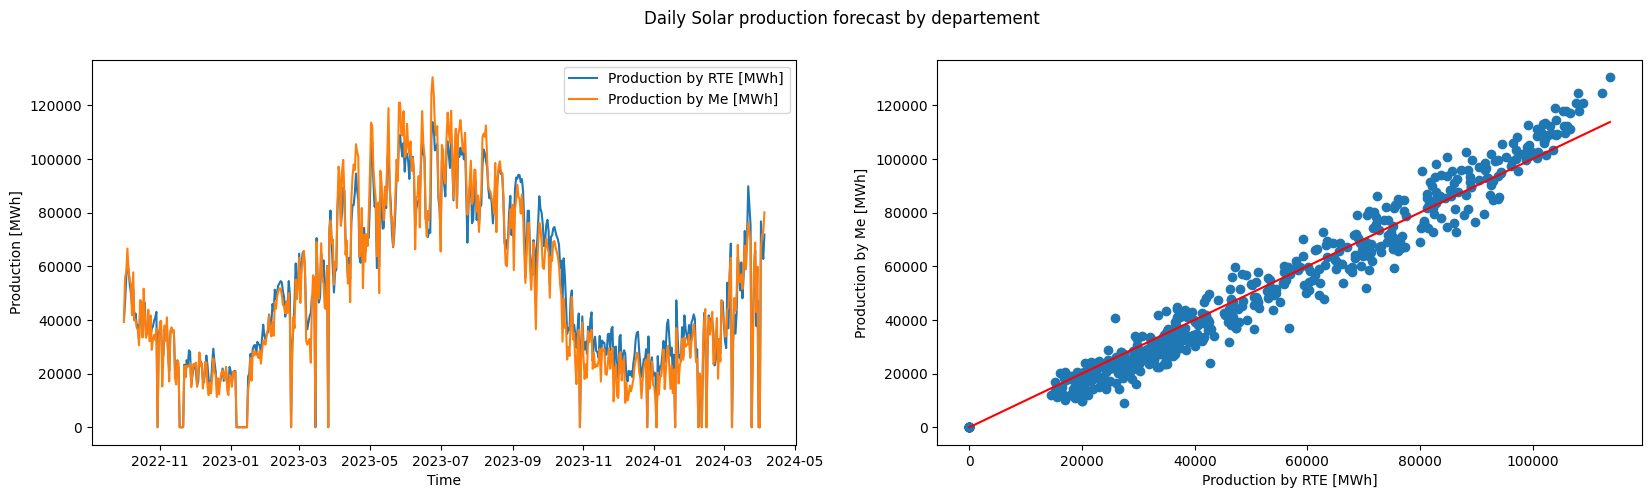

In [140]:
Ypred_sun_deps = model_sun_deps.predict(X_sun_deps)
Ypred_sun_deps = pd.Series(data=Ypred_sun_deps, index=Y_sun_deps.index)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20, 5))
ax1.plot(Y_sun_deps.resample("1D").sum(), label="Production by RTE [MWh]")
ax1.plot(Ypred_sun_deps.resample("1D").sum(), label="Production by Me [MWh]")
ax1.set_xlabel("Time")
ax1.set_ylabel("Production [MWh]")
ax1.legend()
ax2.scatter(Y_sun_deps.resample("1D").sum(), Ypred_sun_deps.resample("1D").sum())
ax2.set_xlabel("Production by RTE [MWh]")
ax2.set_ylabel("Production by Me [MWh]")

xs = np.linspace(Y_sun_deps.resample("1D").sum().min(), Y_sun_deps.resample("1D").sum().max(), 100)
ax2.plot(xs, xs, color="red")

print(mean_squared_error(Y_sun_deps, Ypred_sun_deps), r2_score(Y_sun_deps, Ypred_sun_deps))
fig.suptitle("Daily Solar production forecast by departement")

## Wind power prediction


In [141]:
X_wind_deps = wind_speed_deps.loc[start_date:end_date]
X_wind_deps = X_wind_deps.loc[~X_wind_deps.index.duplicated(keep="first")].dropna()
X_wind_deps, Y_wind_deps = X_wind_deps.align(prediction_eolien, axis=0, join="inner")

Xwind_squared = X_wind_deps ** 2
Xwind_squared.columns = [f"{col}_squared" for col in Xwind_squared.columns]
Xwind_cubed = X_wind_deps ** 3
Xwind_cubed.columns = [f"{col}_cubed" for col in Xwind_cubed.columns]

X_wind_deps = pd.concat([X_wind_deps, Xwind_squared, Xwind_cubed], axis=1)

model_wind_departements = LinearRegression(positive=True, fit_intercept=False)
model_wind_departements.fit(X_wind_deps, Y_wind_deps)

Ypred_wind_deps = model_wind_departements.predict(X_wind_deps)
Ypred_wind_deps = pd.Series(data=Ypred_wind_deps, index=Y_wind_deps.index)

1368699.3909112825 0.9162764933854207


Text(0.5, 0.98, 'Daily Wind production forecast by departement')

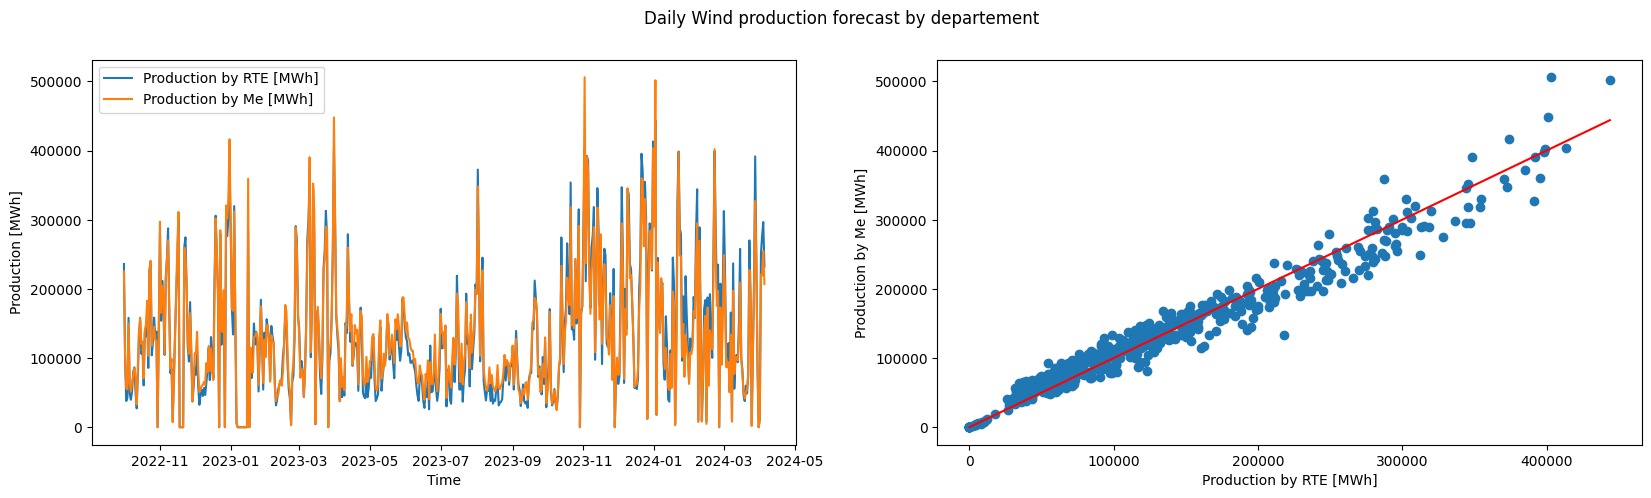

In [142]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20, 5))
ax1.plot(Y_wind_deps.resample("1D").sum(), label="Production by RTE [MWh]")
ax1.plot(Ypred_wind_deps.resample("1D").sum(), label="Production by Me [MWh]")
ax1.set_xlabel("Time")
ax1.set_ylabel("Production [MWh]")
ax1.legend()

ax2.scatter(Y_wind_deps.resample("1D").sum(), Ypred_wind_deps.resample("1D").sum())
ax2.set_xlabel("Production by RTE [MWh]")
ax2.set_ylabel("Production by Me [MWh]")
xs = np.linspace(Y_wind_deps.resample("1D").sum().min(), Y_wind_deps.resample("1D").sum().max(), 100)
ax2.plot(xs, xs, color="red")

print(mean_squared_error(Y_wind_deps, Ypred_wind_deps), r2_score(Y_wind_deps, Ypred_wind_deps))
fig.suptitle("Daily Wind production forecast by departement")

In [154]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

mape_sun_regions = mean_absolute_percentage_error(Y_sun_region.resample("1D").sum(), Ypred_sun_region.resample("1D").sum())
mape_wind_regions = mean_absolute_percentage_error(Y_wind_region.resample("1D").sum(), Ypred_wind_region.resample("1D").sum())
mape_sun_deps = mean_absolute_percentage_error(Y_sun_deps.resample("1D").sum(), Ypred_sun_deps.resample("1D").sum())
mape_wind_deps = mean_absolute_percentage_error(Y_wind_deps.resample("1D").sum(), Ypred_wind_deps.resample("1D").sum())

r2_score_sun_regions = r2_score(Y_sun_region.resample("1D").sum(), Ypred_sun_region.resample("1D").sum())
r2_score_wind_regions = r2_score(Y_wind_region.resample("1D").sum(), Ypred_wind_region.resample("1D").sum())
r2_score_sun_deps = r2_score(Y_sun_deps.resample("1D").sum(), Ypred_sun_deps.resample("1D").sum())
r2_score_wind_deps = r2_score(Y_wind_deps.resample("1D").sum(), Ypred_wind_deps.resample("1D").sum())


for mape, name in zip([mape_sun_regions, mape_wind_regions, mape_sun_deps, mape_wind_deps], ["Sun regions", "Wind regions", "Sun departements", "Wind departements"]):
    print(f"MAPE for {name}: {mape}")
    
for r2, name in zip([r2_score_sun_regions, r2_score_wind_regions, r2_score_sun_deps, r2_score_wind_deps], ["Sun regions", "Wind regions", "Sun departements", "Wind departements"]):
    print(f"R2 score for {name}: {r2}")

MAPE for Sun regions: 0.12204288234901514
MAPE for Wind regions: 0.16100810279651592
MAPE for Sun departements: 0.10935412732983961
MAPE for Wind departements: 0.1433997199021978
R2 score for Sun regions: 0.9461205249843254
R2 score for Wind regions: 0.9455988519165638
R2 score for Sun departements: 0.9532866823474965
R2 score for Wind departements: 0.9556846468748688


# Conclusion

We have seen that we can predict the production of the different energy sources using the weather data.

We have also seen that we can use the data for the 94 departments of France, instead of the 13 regions, to improve slightly the prediction.
There is the Daily R2 and MAPE for the different models:

## R²

| | Sun r² | Wind r² |
|---|---|---|
| Regions | 0.94 | 0.94 |
| Departments | 0.95 | 0.95 |


| | Sun MAPE | Wind MAPE |
|---|---|---|
| Regions | 0.12 | 0.16 |
| Departments | 0.10 | 0.14 |

# Next steps

- [ ] Include other features in the model, such as temperature, humidity, etc.
- [ ] Use a more complex model, such as XGBoost, to improve the prediction.
